Download Joseph data from XL(/Users/amitlevi/Desktop/DeepCheck/Ex2 Convolution, Filtering, Gradients - answers/Dataset_sq_JOSEPH.xlsx) file to json file

* Download Joseph transactions from XL file 
* Convert each transaction to a vector
* Save all transactions in list




     CLIENT       NAME PRODUCT_TYPE ACTION ACTION.1     DATE_TRANSACTION  \
0  Persona2  ABB LTD N        SHARE    Buy        B  2023-10-24 09:18:13   
1  Persona2  ABB LTD N        SHARE   Sell        S  2023-11-03 16:04:36   
2  Persona2  ABB LTD N        SHARE    Buy        B  2023-10-09 10:58:53   
3  Persona2  ABB LTD N        SHARE   Sell        S  2023-10-16 11:48:32   
4  Persona2   NESTLE N        SHARE   Sell        S  2023-11-03 16:04:58   

    QTY  UNIT_PRICE      ISIN_CODE       STOCK_LIBELLE CURRENCY  TOTAL_AMOUNT  \
0  40.0       29.87  CH00122217164  SIX Swiss Exchange      CHF       1194.80   
1   7.0       31.23  CH00122217164  SIX Swiss Exchange      CHF        218.61   
2  29.0       32.88  CH00122217164  SIX Swiss Exchange      CHF        953.52   
3  29.0       32.74  CH00122217164  SIX Swiss Exchange      CHF        949.46   
4   3.0       99.89  CH00388633504  SIX Swiss Exchange      CHF        299.67   

  ACTION_TYPE 'CHF_'||CURRENCY  RATE_EUR  RATE_USD  
0  

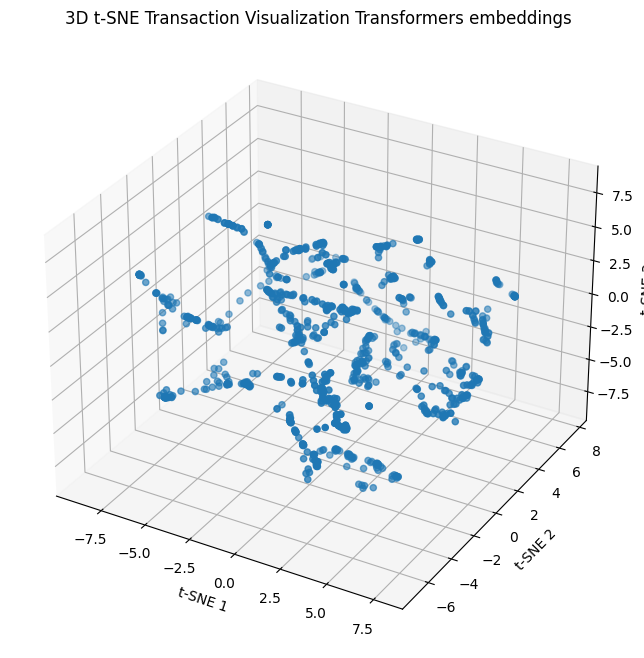

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1776 samples in 0.000s...
[t-SNE] Computed neighbors for 1776 samples in 0.072s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1776
[t-SNE] Computed conditional probabilities for sample 1776 / 1776
[t-SNE] Mean sigma: 0.351445
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.489090
[t-SNE] KL divergence after 300 iterations: 0.726344


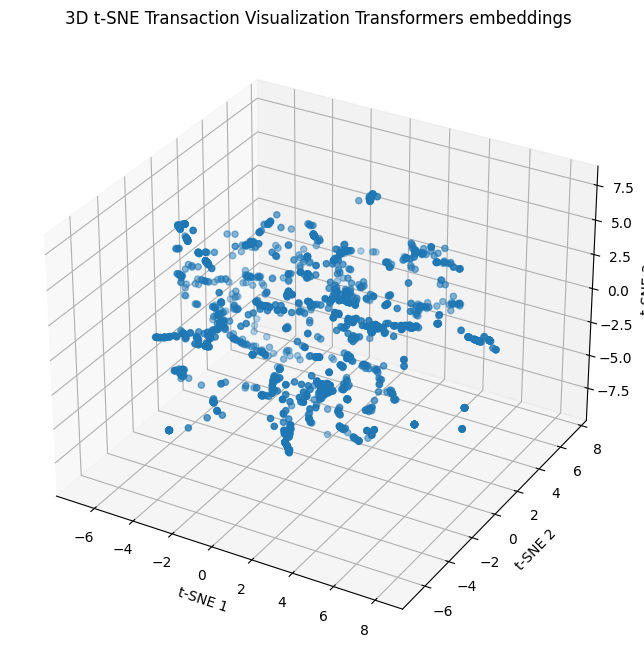

In [1]:
#Download Joseph data from XL(/Users/amitlevi/Desktop/DeepCheck/Ex2 Convolution, Filtering, Gradients - answers/Dataset_sq_JOSEPH.xlsx) file to json file
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import math
import statistics
import scipy.stats as st
import random
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit
import Client as cl
# Read the data from the excel file
df = pd.read_excel('/Users/amitlevi/Desktop/DeepCheck/Ex2 Convolution, Filtering, Gradients - answers/Dataset_sq_JOSEPH.xlsx')
df_other = pd.read_excel('/Users/amitlevi/Desktop/DeepCheck/Ex2 Convolution, Filtering, Gradients - answers/Dataset_sq_EVA.xlsx')

# Create vector for transaction (one line in the data) according to the features in the data

    
# Interface
Joseph_list_of_vectors = cl.create_list_of_vectors(df)
Eva_list_of_vectors = cl.create_list_of_vectors(df_other)
cl.print_list_of_vectors(Joseph_list_of_vectors)
cl.print_list_of_vectors(Eva_list_of_vectors)

# T-SNE
# Joseph
Joseph_list_of_vectors = cl.plot_t_sne(Joseph_list_of_vectors)
# Eva

Eva_list_of_vectors = cl.plot_t_sne(Eva_list_of_vectors)






    

    

# 

# Extand the features augment the data

In [2]:

#data/extended/evaExtended.csv
df_jos = pd.read_csv('data/extended/evaExtended1.csv')
df_eva = pd.read_csv('data/extended/josephExtended1.csv')
print(df_jos.head())
 

#create sintatyic data

      
# Print the all features in the data
print(df_jos.columns)


#create vector for transaction (one line in the data) according to the features in the data
Joseph_list_of_vectors = cl.create_list_of_vectors(df_jos)
Eva_list_of_vectors = cl.create_list_of_vectors(df_eva)

# create user user 
import Client as cl
user1 = cl.CLIENT("Joseph", Joseph_list_of_vectors)
user2 = cl.CLIENT("Eva", Eva_list_of_vectors)


import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle





# Create 5 users with synthetic data
users = []
import os

# Create 5 users with synthetic data
users = []
for i in range(10):
    # Create a synthetic data
    df = cl.createSyntheticData(df_jos)
    # Create a user
    user = cl.CLIENT("user" + str(i), cl.create_list_of_vectors(df))
    users.append(user)
    # Save the data to a csv file
    df.to_csv(os.path.join('data', 'synthetic', 'user' + str(i) + '.csv'), index=False)






    













   Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  CLIENT  \
0             0            58            58            58        1202  200341   
1             1            59            59            59        1247  200341   
2             2            74            74            74        1668  200341   
3             3            67            67            67        1442  200341   
4             4            21            21            21         238  200341   

                             NAME PRODUCT_TYPE ACTION ACTION.1  ...  \
0               CISCO SYSTEMS ORD        SHARE    Buy        B  ...   
1                   CAPGEMINI ORD        SHARE    Buy        B  ...   
2                       TESLA ORD        SHARE   Sell        S  ...   
3                  KKR AND CO ORD        SHARE   Sell        S  ...   
4  INTERNATIONAL BUSINESS MACHINE        SHARE    Buy        B  ...   

  StockFeature_freeCashflow  StockFeature_operatingCashflow  \
0              1.634300

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def transaction_to_vector(transaction, encoders):
    vector = []

    for i, item in enumerate(transaction):
        if isinstance(item, str):
            # Transform categorical data using one-hot encoding
            transformed = encoders[i].transform([[item]]).toarray().flatten()
            vector.extend(transformed)
        elif np.isnan(item):
            # Handle NaN for numerical data
            vector.append(0)
        else:
            # Add numerical data directly
            vector.append(item)

    return vector

# Example usage
transaction = [np.nan, 'CHF', 5000.00, 'Income', 'CHF_CHF', 0.677943, 0.604011]

# Create and fit encoders for each categorical feature
# This should be done using the full dataset
encoders = {}
for i, item in enumerate(transaction):
    if isinstance(item, str):
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder.fit(np.array(transaction[i]).reshape(-1, 1))
        encoders[i] = encoder

vector = transaction_to_vector(transaction, encoders)
print(vector)


[0, 1.0, 5000.0, 1.0, 1.0, 0.677943, 0.604011]
